# Constraint elimination

In [5]:
%matplotlib widget
import numpy as np
from numpy.linalg import norm
from math import factorial 
import matplotlib.pyplot as plt
from pytransform3d.transformations import transform_from
from pytransform3d.rotations import matrix_from_two_vectors, random_vector
from pytransform3d.plot_utils import plot_sphere, make_3d_axis, plot_vector, plot_box
from pytransform3d.camera import make_world_grid

# from skspatial.objects import Plane, Point

def projToPlane(P, O, N):
    """Project point pt to plane with normal N through the origin

    Args:
        P (_type_): Point to be projected to plane
        O (_type_): Plane origin
        N (_type_): Plane normal
    """
    # N_norm: Normalized normal vectors
    N_norm = (N/ norm(N))

    P_proj = P - (P-O).transpose().dot(N_norm) * N_norm

    return P_proj

def plot3DPoint(ax, pt, color, s=50, a=1.0, label=''):
    ax.scatter(pt[0], pt[1], pt[2], s=s, c=color, alpha=a, label=label)
    
def plotPlane(ax, pt, N):
    """Plot a plane

    Args:
        ax (_type_): matlab ax
        pt (_type_): pt
        N (_type_): Normal vector of plane
    """

    # https://dfki-ric.github.io/pytransform3d/_apidoc/pytransform3d.plot_utils.plot_box.html#pytransform3d.plot_utils.plot_box
    world_frame = np.array([1.0, 1.0, 1.0])
    print("N: ", N)

    trans_mat = matrix_from_two_vectors(N,world_frame)
    A2B = transform_from(
        R=trans_mat,
        p=pt)
    plot_box(ax, 
            size=[0.01, 5.0, 5.0],
            A2B = A2B,
            alpha = 0.1,
            wireframe=False)

def plotVector(ax, start, direction, ax_s=0.5):
    plot_vector(
        ax,
        # A vector is defined by start, direction, and s (scaling)
        start= start,
        direction= direction,
        s=1.0,
        ax_s=ax_s,  # Scaling of 3D axes
        lw=1,  # Remove line around arrow
        color="orange"
    )

def clearAllPlots():
    plt.figure().clear()
    plt.close()
    plt.cla()
    plt.clf()



pt =  [[1. 0. 1.]]
N:  [[0. 0. 1.]]
N:  [0. 0. 1.]


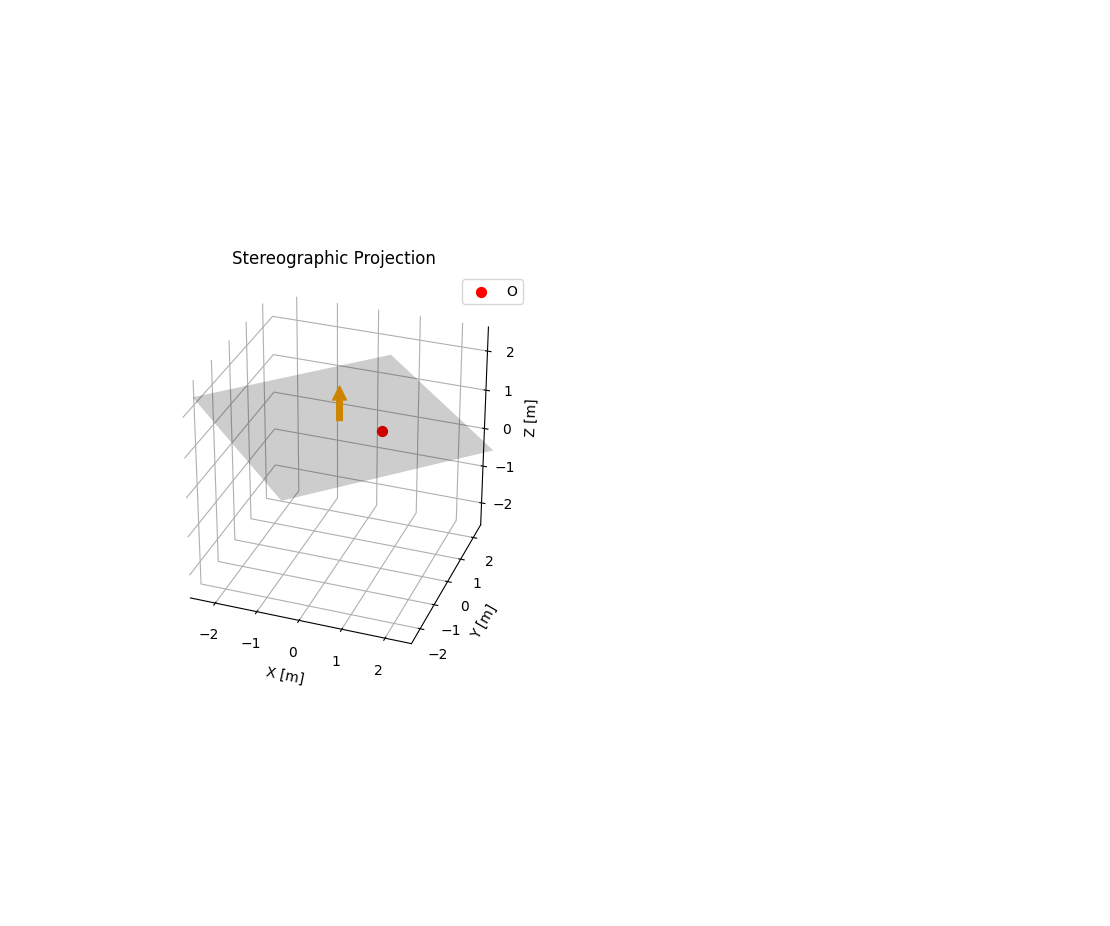

In [12]:
origin = np.vstack(([0.0], [0.0], [1.0])) 
pt = np.vstack(([1.0], [0.0], [1.0]))                # Point

N_prenorm = np.array([[0.0], [0.0], [1.0]])         # Pre-normalized North vector N
N = 1 * (N_prenorm/ np.linalg.norm(N_prenorm))    # North vector N

print("pt = ", pt.transpose())
print("N: ", N.transpose())

#####
# Plotting
#####
clearAllPlots()

fig = plt.figure(0, figsize=(6, 6))
ax = make_3d_axis(1, 121, unit="m")
ax.set_title("Stereographic Projection")
ax.view_init(elev=30, azim=-70)

#@@@@@@@@@@@@@@@@@@@@@@
# Point visualizations
#@@@@@@@@@@@@@@@@@@@@@@
# Plot center of circle
plot3DPoint(ax, pt, 'r', s=50, a=1.0, label='O') # Red 

# Plot normal vector of plane
plotVector(ax, origin.transpose().flatten(), N.transpose().flatten(), ax_s=0.1)

# Plot plane 
plotPlane(ax, origin.transpose().flatten(), N.transpose().flatten())

ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-2.5, 2.5)
ax.set_zlim(-2.5, 2.5)

# Plot world grid
# world_grid = make_world_grid(n_lines=51, n_points_per_line=11, xlim = (-2.5, 2.5), ylim = (-2.5, 2.5),)
# ax.scatter(
#     world_grid[:, 0], world_grid[:, 1], world_grid[:, 2], s=1, alpha=0.4)
# ax.scatter(world_grid[-1, 0], world_grid[-1, 1], world_grid[-1, 2], color="r")

plt.legend()

plt.show()

In [55]:
# # Sphere to sphere intersection
# def getIntersectionCenter(ax, s_a, s_b):
#     dir_vec = s_b.center - s_a.center
#     dist_centroids = np.linalg.norm(dir_vec)
#     dist_intersect = (s_a.radius**2 + dist_centroids**2 - s_b.radius**2) / (2*dist_centroids)

#     pt_intersect = s_a.center + (dist_intersect/dist_centroids) * dir_vec

#     plotVector(ax, s_a.center.transpose().flatten(), dir_vec.transpose().flatten())

#     return pt_intersect 

# o_a = np.array([[0.0], [0.0], [0.0]]) # Sphere center
# r_a = 1.0 # Sphere radius

# o_b = np.array([[0.0], [2.0], [0.0]]) # Sphere center
# r_b = 2.0 # Sphere radius

# s_a = SingleSphere(o_a, r_a, color=[1, 0, 0], alpha = 0.2) 
# s_b = SingleSphere(o_b, r_b, color=[0, 1, 0], alpha = 0.2) 

# #####
# # Plotting
# #####

# clearAllPlots()

# fig = plt.figure(0, figsize=(10, 10))
# ax = make_3d_axis(1, 121, unit="m")
# ax.set_title("Stereographic Projection")
# ax.view_init(elev=30, azim=-70)

# plotSingleSphere(ax, s_a)
# plotSingleSphere(ax, s_b)

# intersect_pt = getIntersectionCenter(ax, s_a, s_b)
# plot3DPoint(ax, intersect_pt, 'r') # Red

# ax.set_xlim(-2.5, 2.5)
# ax.set_ylim(-2.5, 2.5)
# ax.set_zlim(-2.5, 2.5)

# plt.show()

# References:
[1] Geometrically Constrained Trajectory Optimization for Multicopters